In [ ]:
#!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [16]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 1.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [61]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import plotly.graph_objs as go

# Expanded list of keywords (replace with your actual file path)
keywords = pd.read_excel('/content/drive/MyDrive/GSC Keywords.xlsx')["Top queries"].tolist()

# Load the pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the keywords
embeddings = model.encode(keywords)

# Perform Agglomerative Clustering with adjusted parameters
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=2.5)  # Adjust parameters as needed
clusters = agg_cluster.fit_predict(embeddings)

# Use t-SNE to reduce dimensions for visualization
tsne = TSNE(n_components=3, perplexity=30, n_iter=300, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings)

# Create a DataFrame for easy manipulation
df = pd.DataFrame(embeddings_3d, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
df['Cluster'] = clusters
df['Keyword'] = keywords

# Create traces for each cluster
data = []
for cluster_id in np.unique(clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    trace = go.Scatter3d(
        x=cluster_data['Dimension 1'],
        y=cluster_data['Dimension 2'],
        z=cluster_data['Dimension 3'],
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.8,
            color=cluster_id,
        ),
        name=f'Cluster {cluster_id}',
        text=cluster_data['Keyword']
    )
    data.append(trace)

# Create layout
layout = go.Layout(
    title='Interactive 3D visualization of Agglomerative Clustering',
    scene=dict(
        xaxis=dict(title='Dimension 1'),
        yaxis=dict(title='Dimension 2'),
        zaxis=dict(title='Dimension 3'),
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning:

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.



In [62]:
# Assuming you have already performed clustering and have the 'clusters' variable
for cluster_id in np.unique(clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    for keyword in cluster_data['Keyword']:
        print(f"  - {keyword}")
    print()  # Add an empty line between clusters

Cluster 0:
  - 1099 k threshold 2022
  - 1099 payroll
  - 1099-k threshold 2022
  - 1099 payroll services
  - 1099 payroll taxes
  - 1099k 2022
  - payroll for 1099 employees
  - 1099 misc 2019
  - w2 and 1099 in same year
  - w2 and 1099 income
  - can you 1099 an llc
  - can you 1099 a llc
  - i have a w2 and 1099
  - 1099-k 2022
  - 1099 k 2022
  - 1099 vs llc
  - 1099 k minimum
  - 1099-k delay
  - 1099 payroll company
  - payroll for 1099
  - 1099 misc nec
  - 1099 k delay
  - form 1099 misc with nec
  - 1099 misc nec deadline
  - 1099 payroll companies
  - 1099 k requirements 2022
  - irs form 1099 nec 2021
  - 1099-k requirements 2022
  - how to do payroll for 1099 employees
  - form 1099 misc nec
  - 1099 nec due dates
  - 1099 nec deadline
  - 1099 nec due date
  - 1099 employee payroll
  - 1099 misc 2021
  - changes to 1099 misc for 2021
  - when are 1099 due 2021

Cluster 1:
  - augusto rule
  - august rule
  - augsta rule
  - augustus tax rule
  - aigusta rule
  - augasta r

In [66]:
# Prepare data for CSV export
cluster_keywords = []
for cluster_id in np.unique(clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    keywords_list = ", ".join(cluster_data['Keyword'].astype(str))  # Convert keywords to string explicitly
    cluster_keywords.append({'Cluster': cluster_id, 'Keywords': keywords_list})

# Convert to DataFrame
cluster_keywords_df = pd.DataFrame(cluster_keywords)

# Save to CSV
output_csv_path = '/content/drive/MyDrive/Clustered_Keywords.csv'  # Replace with your desired output path
cluster_keywords_df.to_csv(output_csv_path, index=False)
print(f"Cluster keywords saved to {output_csv_path}")

Cluster keywords saved to /content/drive/MyDrive/Clustered_Keywords.csv


In [ ]:
# @title
import spacy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Load spaCy model
nlp = spacy.load('en_core_web_md')

# Vectorization
vectors = [nlp(keyword).vector for keyword in keywords]

# Clustering
kmeans = KMeans(n_clusters=30)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(vectors)

# Reduce dimensions for visualization
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(vectors)

# Create a DataFrame for easy manipulation
df = pd.DataFrame(embeddings_3d, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
df['Cluster'] = clusters
df['Keyword'] = keywords

# Create traces for each cluster
data = []
for cluster_id in np.unique(clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    trace = go.Scatter3d(
        x=cluster_data['Dimension 1'],
        y=cluster_data['Dimension 2'],
        z=cluster_data['Dimension 3'],
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.8,
            color=cluster_id,
            colorscale='Viridis',  # You can change the color scale here
        ),
        name=f'Cluster {cluster_id}',
        text=cluster_data['Keyword']
    )
    data.append(trace)

# Create layout
layout = go.Layout(
    title='Interactive 3D visualization of KMeans Clustering',
    scene=dict(
        xaxis=dict(title='Dimension 1'),
        yaxis=dict(title='Dimension 2'),
        zaxis=dict(title='Dimension 3'),
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()

# Print clusters
for cluster_id, keywords_in_cluster in df.groupby('Cluster')['Keyword']:
    print(f"Cluster {cluster_id + 1}: {', '.join(keywords_in_cluster)}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster 1: irs code section 280a(g), section 280a(g), irc section 280, file separately or jointly, married filing jointly or separately, should i file jointly or separately, should i file separately or jointly, file jointly or separately, form 4070, married file separately or jointly, married file jointly or separately, filing jointly or separately, form 15227
Cluster 2: w2 for child employee, depreciate software, practice forward, accounting firms, accounting firm, seamless logistics, paying kids from business, plus accounting, payroll for kids, s corp kids on payroll, child on payroll, 32 jobs your child can perform in your business, paying kids through business, s corp paying children, paying family members, compliance accountant, offshore accountant, offshore accounting, offshore team for accountants, offshore accounting services, accounting services, offshore accountants, accounting consultation, columbus accounting firms, accounting offshore, offshore services for accounting firm

In [73]:
import csv
from collections import defaultdict

def find_top_clusters(csv_file, top_n=20):
    cluster_keywords = defaultdict(list)

    # Read the CSV file
    with open(csv_file, 'r', newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)

        # Iterate through each row (cluster)
        for row in reader:
            cluster_id = int(row['Cluster'])
            keywords_str = row['Keywords']
            keywords = keywords_str.split(', ')

            # Count total keywords in the cluster
            total_keywords = len(keywords)

            # Store total keywords and keywords list for the cluster
            cluster_keywords[cluster_id] = {
                'total_keywords': total_keywords,
                'keywords': keywords[:3]  # Store the first 3 keywords
            }

    # Sort clusters by total keywords in descending order
    sorted_clusters = sorted(cluster_keywords.items(), key=lambda x: x[1]['total_keywords'], reverse=True)

    # Extract top clusters based on total keywords
    top_clusters = [(cluster_id, data) for cluster_id, data in sorted_clusters[:top_n]]

    return top_clusters

# Function to print top clusters with details
def print_top_clusters(top_clusters):
    print("Top Clusters:")
    for i, (cluster_id, data) in enumerate(top_clusters, 1):
        total_keywords = data['total_keywords']
        keywords = ', '.join(data['keywords'])

        print(f"{i}. Cluster {cluster_id} - Total Keywords: {total_keywords}")
        print(f"   First 3 Keywords: {keywords}")
        print()

# Example usage:
csv_file = '/content/drive/MyDrive/Clustered_Keywords.csv'  # Replace with your CSV file path
top_clusters = find_top_clusters(csv_file)

# Print top 20 clusters with details
print_top_clusters(top_clusters)

Top Clusters:
1. Cluster 19 - Total Keywords: 65
   First 3 Keywords: augusta rule, how to use the augusta rule, what is the augusta rule

2. Cluster 33 - Total Keywords: 46
   First 3 Keywords: augusta rule tax, augusta rule irs, augusta tax rule

3. Cluster 21 - Total Keywords: 41
   First 3 Keywords: cpa, cpa near me, cpa firm

4. Cluster 0 - Total Keywords: 37
   First 3 Keywords: 1099 k threshold 2022, 1099 payroll, 1099-k threshold 2022

5. Cluster 14 - Total Keywords: 37
   First 3 Keywords: can a business write off consulting fees, are consultant fees tax deductible, tax prep expenses deductible

6. Cluster 3 - Total Keywords: 36
   First 3 Keywords: harper cpa, harper and co, harper and company

7. Cluster 9 - Total Keywords: 36
   First 3 Keywords: accounting services near me, accounting firms near me, accounting firms

8. Cluster 10 - Total Keywords: 35
   First 3 Keywords: accountants columbus ohio, accounting firms columbus ohio, accountant columbus ohio

9. Cluster 13 - T

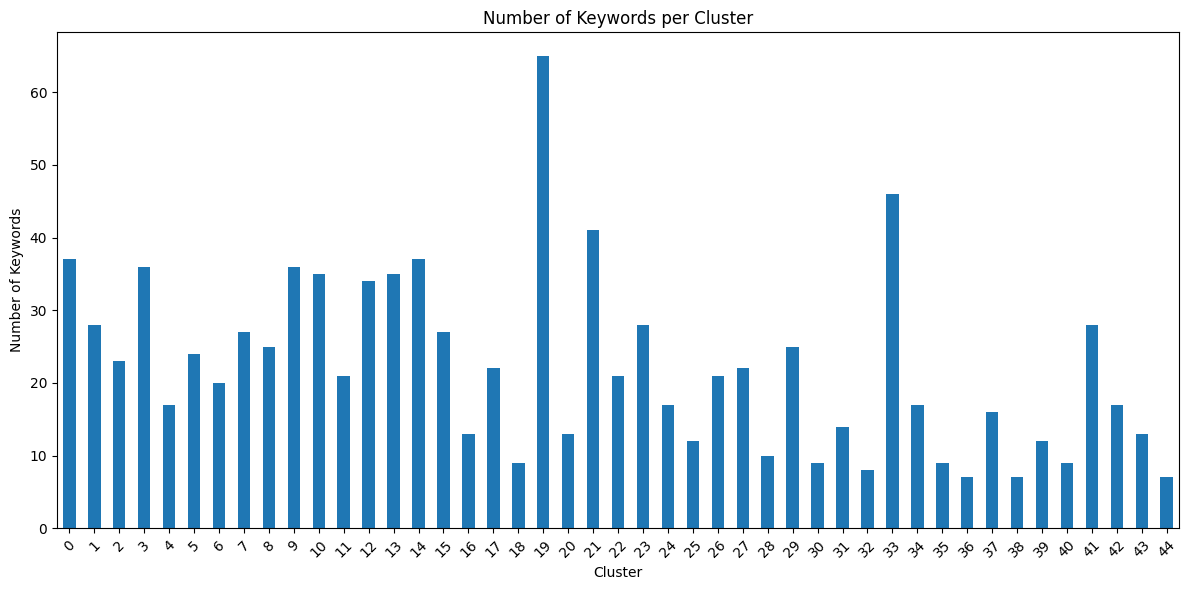

In [79]:
clusters=pd.read_csv(r'/content/drive/MyDrive/Clustered_Keywords.csv')
# Calculate the number of keywords for each cluster
clusters['Num_Keywords'] = clusters['Keywords'].apply(lambda x: len(x.split(', ')))

# Sort clusters by Cluster ID for plotting
clusters = clusters.sort_values(by='Cluster')

# Plotting using Pandas plot
clusters.plot(kind='bar', x='Cluster', y='Num_Keywords', figsize=(12, 6),
              xlabel='Cluster', ylabel='Number of Keywords',
              title='Number of Keywords per Cluster', legend=False)

plt.xticks(rotation=45)
plt.tight_layout()

## Next sheets

In [80]:
import pandas as pd

# Load the data into a pandas DataFrame
data = pd.read_excel('/content/drive/MyDrive/GSC Keywords.xlsx', sheet_name='Pages')

# Print the top pages and their metrics
data

,Top pages,Clicks,Impressions,CTR,Position
0,https://www.harpercpaplus.com/the-augusta-rule...,9792,258825,0.0378,6.92
1,https://www.harpercpaplus.com/putting-your-chi...,2350,39789,0.0591,17.44
2,https://www.harpercpaplus.com/,335,25321,0.0132,24.42
3,https://www.harpercpaplus.com/irs-updates-rule...,224,8565,0.0262,33.11
4,https://www.harpercpaplus.com/meet-the-team/,188,10921,0.0172,16.58
...,...,...,...,...,...
469,https://www.harpercpaplus.com/13-9-million-ame...,0,1,0.0000,84.00
470,https://www.harpercpaplus.com/there-still-migh...,0,1,0.0000,93.00
471,https://www.harpercpaplus.com/what-small-busin...,0,1,0.0000,93.00
472,https://www.harpercpaplus.com/answers-to-quest...,0,1,0.0000,99.00


In [12]:
#!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 19.9 MB/s eta 0:00:00


In [14]:
import pandas as pd
import plotly.express as px
import pycountry

# Load the data into a pandas DataFrame
data2 = pd.read_excel('/content/drive/MyDrive/GSC Keywords.xlsx', sheet_name='Countries')

# Standardize country names

def standardize_country(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        if country:
            return country.alpha_3
    except KeyError:
        pass
    return country_name

data2['iso_alpha3'] = data2['Country'].apply(standardize_country)

# Create a choropleth map
fig = px.choropleth(data2, locations="iso_alpha3", color="Clicks",
                    hover_name="Country", hover_data=["Impressions", "CTR", "Position"],
                    projection="natural earth")
fig.show()

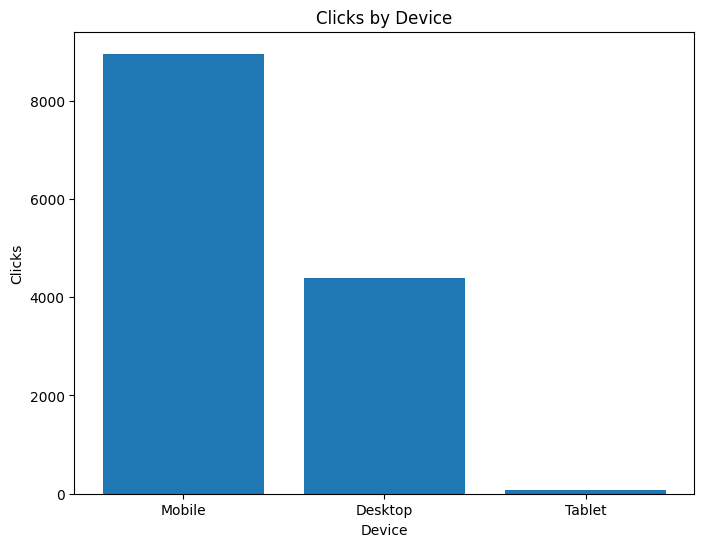

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = pd.read_excel('/content/drive/MyDrive/GSC Keywords.xlsx', sheet_name='Devices')

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(data['Device'], data['Clicks'])
plt.xlabel('Device')
plt.ylabel('Clicks')
plt.title('Clicks by Device')
plt.show()

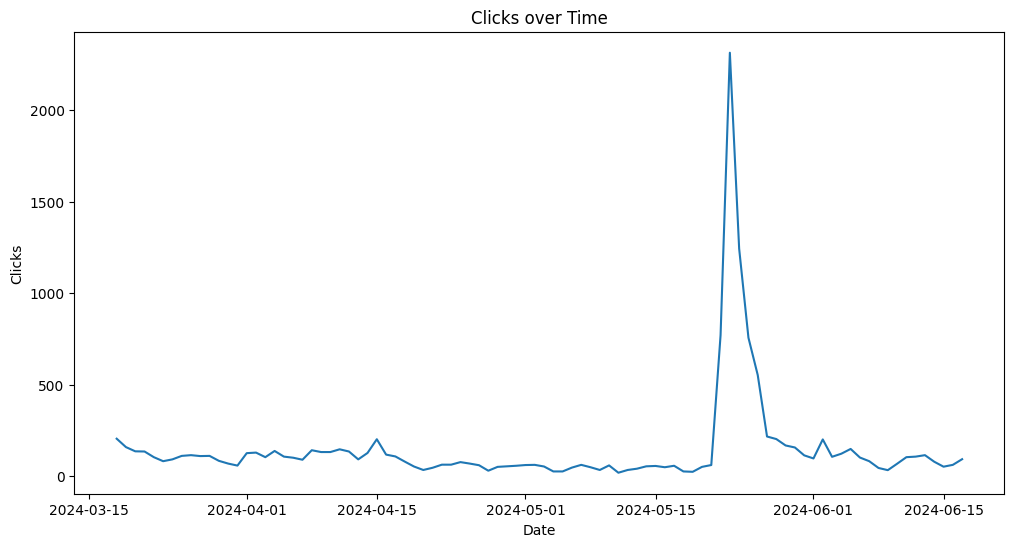

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = pd.read_excel('/content/drive/MyDrive/GSC Keywords.xlsx', sheet_name='Dates')

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Clicks'])
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.title('Clicks over Time')
plt.show()